# Libraries

In [2]:
import subprocess
from functions import *

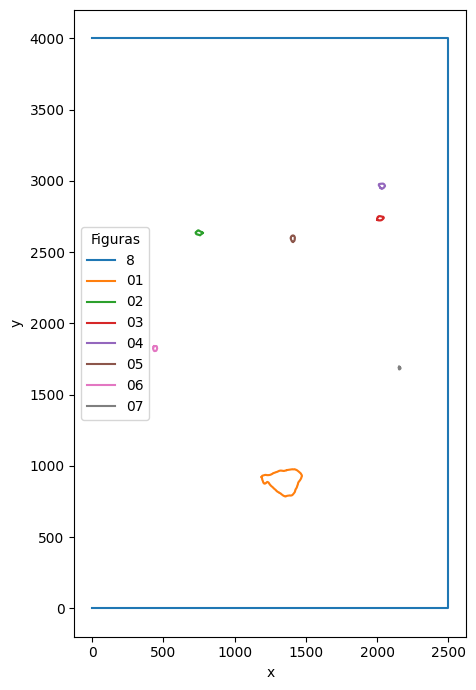

In [9]:
import json
import math
import matplotlib.pyplot as plt

def same_point(x1, y1, x2, y2, tol=1e-9):
    return math.isclose(x1, x2, rel_tol=0, abs_tol=tol) and math.isclose(y1, y2, rel_tol=0, abs_tol=tol)

# --- carregue seu arquivo ---
with open("malha_1.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# --- limpa cada figura ---
for key, fig in data.items():
    x = fig.get("x coordinate", [])
    y = fig.get("y coordinate", [])
    if len(x) >= 2 and len(y) >= 2 and len(x) == len(y):
        if same_point(x[0], y[0], x[-1], y[-1], tol=1e-9):
            # remove o último ponto duplicado
            x.pop()
            y.pop()
    else:
        # opcional: avisar se algo estranho estiver nas listas
        print(f"Aviso: listas X/Y inválidas na chave {key} (lenX={len(x)}, lenY={len(y)})")

# --- salva saneado ---
with open("saida_saneada.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# --- plota ---
plt.figure(figsize=(9, 7))
for key, fig in data.items():
    x = fig["x coordinate"]
    y = fig["y coordinate"]
    plt.plot(x, y, label=f"{key}")

plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Figuras")
plt.tight_layout()
plt.show()


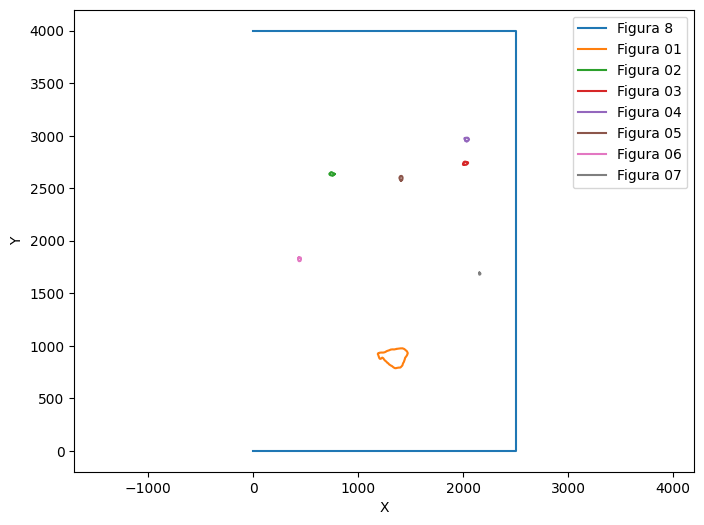

In [8]:
import json
import matplotlib.pyplot as plt

# Carregar o JSON
with open("malha_1.json", "r") as f:
    data = json.load(f)

plt.figure(figsize=(8, 6))

# Iterar sobre as figuras (chaves do JSON)
for key, fig in data.items():
    x = fig["x coordinate"]
    y = fig["y coordinate"]
    plt.plot(x, y, label=f"Figura {key}")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis("equal")
plt.show()


# Contour Mesh

In [4]:
mesh_gen('saida_saneada.json', mesh_size=5000, outfile="saida_saneada.geo")

## Save in `.msh`format

In [11]:
shell_output = subprocess.run('"C:\\Users\\wande\\Downloads\\gmsh-4.14.0-Windows64 (2)\\gmsh-4.14.0-Windows64\\gmsh.exe" "C:\\git-projetos\\chloride_ingress_probabilistic_model\\saida_saneada.geo" -2', shell=True)
print(shell_output)

CompletedProcess(args='"C:\\Users\\wande\\Downloads\\gmsh-4.14.0-Windows64 (2)\\gmsh-4.14.0-Windows64\\gmsh.exe" "C:\\git-projetos\\chloride_ingress_probabilistic_model\\saida_saneada.geo" -2', returncode=1)


## Plot mesh

In [ ]:
import matplotlib.pyplot as plt
import meshio
import numpy as np

# Carrega a malha
mesh = meshio.read("saida_saneada.msh")
points = mesh.points
cells = mesh.cells_dict.get("triangle", None)
cell_data = mesh.cell_data_dict.get("gmsh:physical", {}).get("triangle", None)

if cells is not None and cell_data is not None:
    # Identifica grupos físicos e cria cores
    group_ids = np.unique(cell_data)
    n_groups = len(group_ids)

    # Compatível com todas as versões: plt.get_cmap
    color_map = plt.get_cmap("tab10")  # tab10 tem 10 cores
    colors = {group_id: color_map(i % 10) for i, group_id in enumerate(group_ids)}

    plt.figure(figsize=(6, 6))
    for i, triangle in enumerate(cells):
        tri_pts = points[triangle]
        x = list(tri_pts[:, 0]) + [tri_pts[0, 0]]  # fecha o triângulo
        y = list(tri_pts[:, 1]) + [tri_pts[0, 1]]
        group_id = cell_data[i]
        plt.fill(x, y, color=colors[group_id], edgecolor='k', linewidth=0.5)

    plt.gca().set_aspect('equal')
    plt.title("Mesh by physical group")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()
else:
    print("Mesh or physical groups not found.")
